In [50]:
import yfinance as yf
import pandas
import pickle
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [51]:
td = yf.Ticker('GME')
gme = td.history(start='2021-1-19', end='2021-2-12', interval='1h')
gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-01-19 09:30:00-05:00,40.634800,45.520000,36.639999,37.610001,34966133,0,0
2021-01-19 10:30:00-05:00,37.653702,39.480000,36.750000,38.480099,11234435,0,0
2021-01-19 11:30:00-05:00,38.487400,41.669998,38.000000,40.985001,9210651,0,0
2021-01-19 12:30:00-05:00,40.975201,42.299999,40.290001,40.970001,7621300,0,0
2021-01-19 13:30:00-05:00,40.970001,41.340000,39.660000,39.889999,3827122,0,0
...,...,...,...,...,...,...,...
2021-02-11 11:30:00-05:00,49.099998,50.268299,48.240002,48.400002,1561553,0,0
2021-02-11 12:30:00-05:00,48.400101,49.454601,48.230000,49.139999,1099170,0,0
2021-02-11 13:30:00-05:00,49.099800,49.740002,48.220100,48.910000,1011721,0,0
2021-02-11 14:30:00-05:00,48.900002,49.349998,48.509998,49.049999,597329,0,0


In [52]:
df0 = pandas.read_csv('../../data/reddit_wsb.csv')

In [53]:
import datetime
import time
gme['unix'] = (gme.index.astype(np.int64)//1e9).astype(np.int64)
gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits,unix
2021-01-19 09:30:00-05:00,40.634800,45.520000,36.639999,37.610001,34966133,0,0,1611066600
2021-01-19 10:30:00-05:00,37.653702,39.480000,36.750000,38.480099,11234435,0,0,1611070200
2021-01-19 11:30:00-05:00,38.487400,41.669998,38.000000,40.985001,9210651,0,0,1611073800
2021-01-19 12:30:00-05:00,40.975201,42.299999,40.290001,40.970001,7621300,0,0,1611077400
2021-01-19 13:30:00-05:00,40.970001,41.340000,39.660000,39.889999,3827122,0,0,1611081000
...,...,...,...,...,...,...,...,...
2021-02-11 11:30:00-05:00,49.099998,50.268299,48.240002,48.400002,1561553,0,0,1613061000
2021-02-11 12:30:00-05:00,48.400101,49.454601,48.230000,49.139999,1099170,0,0,1613064600
2021-02-11 13:30:00-05:00,49.099800,49.740002,48.220100,48.910000,1011721,0,0,1613068200
2021-02-11 14:30:00-05:00,48.900002,49.349998,48.509998,49.049999,597329,0,0,1613071800


In [54]:
price_from_time ={}
for index, row in gme.iterrows():
    price_from_time[row['unix']] = row['High']
price_from_time

{1611066600.0: 45.52000045776367,
 1611070200.0: 39.47999954223633,
 1611073800.0: 41.66999816894531,
 1611077400.0: 42.29999923706055,
 1611081000.0: 41.34000015258789,
 1611084600.0: 40.68000030517578,
 1611088200.0: 39.9900016784668,
 1611153000.0: 39.3932991027832,
 1611156600.0: 38.95000076293945,
 1611160200.0: 41.18989944458008,
 1611163800.0: 38.79999923706055,
 1611167400.0: 39.75,
 1611171000.0: 40.13999938964844,
 1611174600.0: 39.380001068115234,
 1611239400.0: 39.790000915527344,
 1611243000.0: 40.95000076293945,
 1611246600.0: 44.75,
 1611250200.0: 41.900001525878906,
 1611253800.0: 42.59000015258789,
 1611257400.0: 42.75,
 1611261000.0: 43.189998626708984,
 1611325800.0: 46.349998474121094,
 1611329400.0: 49.619998931884766,
 1611333000.0: 61.5,
 1611336600.0: 76.7573013305664,
 1611340200.0: 64.19999694824219,
 1611343800.0: 62.34989929199219,
 1611347400.0: 68.0,
 1611585000.0: 120.0,
 1611588600.0: 159.17999267578125,
 1611592200.0: 107.30999755859375,
 1611595800.0: 

In [55]:
q=gme.unix

In [56]:

comms_num_for_time = dict(zip(q,[[] for x in q]))
score_for_time = dict(zip(q,[[] for x in q]))
comms_num_for_time

{1611066600: [],
 1611070200: [],
 1611073800: [],
 1611077400: [],
 1611081000: [],
 1611084600: [],
 1611088200: [],
 1611153000: [],
 1611156600: [],
 1611160200: [],
 1611163800: [],
 1611167400: [],
 1611171000: [],
 1611174600: [],
 1611239400: [],
 1611243000: [],
 1611246600: [],
 1611250200: [],
 1611253800: [],
 1611257400: [],
 1611261000: [],
 1611325800: [],
 1611329400: [],
 1611333000: [],
 1611336600: [],
 1611340200: [],
 1611343800: [],
 1611347400: [],
 1611585000: [],
 1611588600: [],
 1611592200: [],
 1611595800: [],
 1611599400: [],
 1611603000: [],
 1611606600: [],
 1611671400: [],
 1611675000: [],
 1611678600: [],
 1611682200: [],
 1611685800: [],
 1611689400: [],
 1611693000: [],
 1611757800: [],
 1611761400: [],
 1611765000: [],
 1611768600: [],
 1611772200: [],
 1611775800: [],
 1611779400: [],
 1611844200: [],
 1611847800: [],
 1611851400: [],
 1611855000: [],
 1611858600: [],
 1611862200: [],
 1611865800: [],
 1611930600: [],
 1611934200: [],
 1611937800: [

In [57]:
def get_closest_stock_time(ts):
    q = (gme.index.astype(np.int64)//1e9).astype(np.int64)
    for i in range(len(q)-1):
        if np.abs(q[i+1]-ts)>np.abs(q[i]-ts):
            return q[i]
    return q[-1]

In [58]:
# df['stock_time'] = get_closest_stock_time(df)

In [59]:
df0['stock_time'] = df0['created'].apply(get_closest_stock_time)

In [60]:
for index, row in df0.iterrows():
    comms_num_for_time[row['stock_time']].append(row['comms_num'])
    score_for_time[row['stock_time']].append(row['score'])
    if index%10000==9999: print(index+1)

10000
20000
30000


In [61]:
comms_num_for_time

{1611066600: [60,
  68,
  31,
  128,
  10,
  25,
  46,
  19,
  8,
  141,
  69,
  30,
  117,
  69,
  126,
  2638,
  141,
  98,
  30,
  579,
  21,
  46,
  22,
  13,
  23670,
  110,
  20,
  133,
  56,
  130,
  256,
  70,
  140,
  44],
 1611070200: [21, 123, 81, 177, 5, 73, 61, 41, 66, 23, 36, 60, 36],
 1611073800: [22,
  270,
  376,
  50,
  17,
  103,
  22,
  22,
  15,
  18,
  29,
  21,
  27,
  64,
  81,
  19,
  64,
  99,
  5],
 1611077400: [56,
  35,
  69,
  9,
  15,
  13,
  334,
  15,
  15,
  26,
  7,
  34,
  14,
  39,
  71,
  9,
  55,
  209,
  26,
  62,
  19,
  58,
  58,
  16,
  21,
  8,
  29,
  45],
 1611081000: [22,
  14,
  9,
  34,
  104,
  55,
  108,
  56,
  34,
  66,
  56,
  36,
  43,
  18,
  13,
  64,
  62],
 1611084600: [31,
  34,
  26,
  44,
  422,
  7,
  17,
  65,
  69,
  34,
  18,
  20,
  15,
  35,
  60,
  71,
  37,
  12,
  10],
 1611088200: [4,
  35,
  281,
  54,
  14,
  49,
  9,
  24,
  24,
  12,
  8,
  31,
  19,
  8,
  21,
  125,
  26,
  4,
  67,
  42,
  42,
  8,
  25,
  3

In [62]:
!pip install seaborn

In [63]:
import seaborn as sns
sns.set_theme(style="whitegrid")

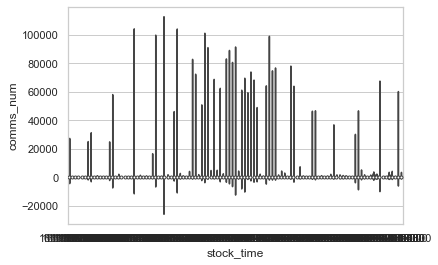

In [64]:
ax = sns.violinplot(x=df0['stock_time'], y=df0['comms_num'])

In [65]:
mean_comms =  [np.mean((x if len(x) > 0 else 0)) for x in comms_num_for_time.values()]
mean_score = [np.mean((x if len(x) > 0 else 0)) for x in score_for_time.values()]

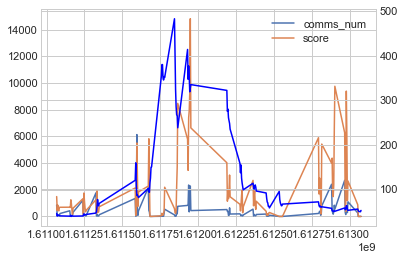

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

ax.plot(comms_num_for_time.keys(), mean_comms, label='comms_num')
ax.plot(score_for_time.keys(), mean_score, label='score')
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(score_for_time.keys(), [x for x in gme["High"]],color="blue", label='3')
ax.legend()
# ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)





In [67]:
import scipy.stats
x = [x for x in gme["High"]]
y = mean_comms
print(scipy.stats.pearsonr(x, y))    # Pearson's r
print(scipy.stats.spearmanr(x, y))   # Spearman's rho
print(scipy.stats.kendalltau(x, y))  # Kendall's tau

(0.07722232194628914, 0.39008464713781416)
SpearmanrResult(correlation=0.05745927691819261, pvalue=0.5227714759427573)
KendalltauResult(correlation=0.039968188547941215, pvalue=0.5100230432204859)


In [68]:
import scipy.stats
x = [x for x in gme["High"]]
y = mean_score
print(scipy.stats.pearsonr(x, y))    # Pearson's r
print(scipy.stats.spearmanr(x, y))   # Spearman's rho
print(scipy.stats.kendalltau(x, y))  # Kendall's tau

(0.24774722852643802, 0.005158227587819763)
SpearmanrResult(correlation=0.1443569728386915, pvalue=0.10680692803838954)
KendalltauResult(correlation=0.1017139157277735, pvalue=0.09362735042867543)


In [69]:
import scipy.stats
x = mean_comms
y = mean_score
print(scipy.stats.pearsonr(x, y))    # Pearson's r
print(scipy.stats.spearmanr(x, y))   # Spearman's rho
print(scipy.stats.kendalltau(x, y))  # Kendall's tau

(0.5471384346501897, 3.3821711069957164e-11)
SpearmanrResult(correlation=0.892331886973439, pvalue=1.1646166594408298e-44)
KendalltauResult(correlation=0.7219278976611966, pvalue=3.35948566352475e-32)


In [70]:
df = pickle.load(open("../../pickle/text_attr.pkl", "rb"))
df['comms_num'] = df0['comms_num']
df['id'] = df0['id']
print(df.head())

   title_gme  body_gme  title_hold  body_hold  title_buy  body_buy  \
0          0         1           0          0          0         1   
1          1         0           1          0          0         0   
2          0         0           0          0          0         0   
3          0         1           0          0          0         0   
4          0         1           0          0          0         1   

   title_retard  body_retard  title_wife  body_wife  ...  yt_link  tweet_link  \
0             0            0           0          0  ...        0           0   
1             0            0           0          0  ...        0           0   
2             0            0           0          0  ...        0           0   
3             0            0           0          0  ...        0           0   
4             0            0           0          0  ...        0           0   

   facebook_link  gif  score  sin_time  cos_time  day  comms_num      id  
0              0 

In [71]:
stock_time_from_id = {}
for index, row in df0.iterrows():
    stock_time_from_id[row['id']] = row['stock_time']
stock_time_from_id

{'l69fvk': 1611768600,
 'l87ci6': 1611952200,
 'lc8dnh': 1612384200,
 'l71knz': 1611851400,
 'l70720': 1611847800,
 'l703gx': 1611847800,
 'lbx3p4': 1612384200,
 'l6955d': 1611768600,
 'l713bc': 1611851400,
 'l4pdma': 1611585000,
 'l69xgn': 1611768600,
 'l70gbc': 1611847800,
 'l6wtpf': 1611844200,
 'l720fg': 1611851400,
 'l6xxs9': 1611844200,
 'lbu4yp': 1612377000,
 'l6bdo8': 1611772200,
 'l28iza': 1611261000,
 'l69rq6': 1611768600,
 'l69c7d': 1611768600,
 'lcj6n5': 1612456200,
 'l67h6z': 1611761400,
 'l4qe5w': 1611588600,
 'l718du': 1611851400,
 'l6z7ao': 1611847800,
 'lbr3no': 1612369800,
 'lgrknp': 1612967400,
 'l6yovq': 1611844200,
 'l68igm': 1611765000,
 'lb5ovl': 1612297800,
 'l685wd': 1611765000,
 'l72ol3': 1611855000,
 'l6git0': 1611779400,
 'l68moc': 1611765000,
 'l7hxt0': 1611865800,
 'l1ztis': 1611239400,
 'l6bdwd': 1611772200,
 'l72duo': 1611855000,
 'l6woqv': 1611844200,
 'l69br4': 1611768600,
 'l6rj8q': 1611844200,
 'l6xd3e': 1611844200,
 'l0kmix': 1611066600,
 'l664kp': 

In [72]:
df['gme'] = df['id'].apply(lambda x: price_from_time[stock_time_from_id[x]])

In [73]:
cols = [i for i in df.columns if i not in ['gme','id']]
corrs = []
for i in cols:
    c = df[i].corr(df['gme'])
    corrs.append([i,c])
corrs.sort(key=lambda x: -abs(x[1]))

In [74]:
corrs

[['cos_time', -0.4808646535501416],
 ['day', -0.43157703603166997],
 ['sin_time', -0.2227238442798362],
 ['title_robinhood', 0.18671472897165964],
 ['body_cap_ratio', 0.16571855195118967],
 ['title_cap_ratio', 0.15833989948686605],
 ['reddit_link', 0.10988691002527229],
 ['body_punctuation', -0.10876535791057927],
 ['title_loss', -0.10141742997332699],
 ['body_look', -0.09912585152596566],
 ['title_nok', 0.09495461871249879],
 ['body_know', -0.09352019388983265],
 ['body_come', -0.09115021039769935],
 ['body_price', -0.09086223905899159],
 ['title_💎', -0.0893207808833197],
 ['body_point', -0.08894116639651303],
 ['body_go', -0.08888795127931005],
 ['body_think', -0.08851620205627453],
 ['body_share', -0.08839943556835375],
 ['body_lose', -0.08394683601321054],
 ['body_post', -0.08342079641643431],
 ['body_week', -0.08272821051087527],
 ['body_time', -0.08152001685376722],
 ['body_high', -0.08116238544243148],
 ['body_lot', -0.08104583611740758],
 ['body_mean', -0.08077772694355959],
 [

In [75]:
print([i for i in corrs if i[0] in ['score','comms_num']])

[['comms_num', -0.018525801666731925], ['score', -0.014689180086951938]]
